## Visualization

#### Post-Preprocessing Data Exploration Checklist

* Missing Value Analysis
* Label Distribution
* Word Count Distribution
* Vocabulary Size
* Word Cloud
* Top Frequent Words

  * Unigrams
  * Bigrams

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS

In [2]:
import string
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from bs4 import BeautifulSoup
from spellchecker import SpellChecker
import emoji

chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocessing_pipeline(review: str):
    """
    Clean and preprocess a review string using the full pipeline.

    Args:
        review (str): The raw review text.
    Returns:
        str: The cleaned and preprocessed review text.
    """
    # 1. quick lowercase
    review = review.lower()

    # 2. strip HTML
    review = BeautifulSoup(review, "html.parser").get_text()

    # 3. strip URLs
    review = re.sub(r'http\S+|www\.\S+', '', review, flags=re.IGNORECASE)

    # 4. strip [bracketed] parts
    review = re.sub(r'\[[^]]*\]', '', review)

    # 5. remove emoji
    review = emoji.replace_emoji(review, replace='')

    # 6. strip punctuation
    review = review.translate(str.maketrans('', '', string.punctuation))

    # 7. chat-word expansion  (done before stop-word removal)
    new_text = []
    for word in review.split():
        if word.upper() in chat_words:
            new_text.append(chat_words[word.upper()])
        else:
            new_text.append(word)
    review = " ".join(new_text)

    # 8. lowercase again so expansions are uniform
    review = review.lower()

    # 9. remove stop-words
    review = ' '.join([word for word in review.split() if word not in stop_words])

    # 10. spelling-correction block — takes time
    # spell = SpellChecker()
    # words = review.split()
    # corrected_words = []

    # for word in words:
    #     corrected = spell.correction(word)
    #     # If correction is None, use the original word
    #     corrected_words.append(corrected if corrected else word)

    # review = " ".join(corrected_words)


    # 11. stemming or lemmatization
    # review = ' '.join([ps.stem(word) for word in review.split()])
    review = ' '.join([lemmatizer.lemmatize(word) for word in review.split()])
    
    return review


In [3]:
df = pd.read_csv('IMDB Dataset.csv')
print(df.shape)
display(df.head())
display(df.info())

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


None

**Observation: This is a binary classification task, and the dataset size is 50K, enough to train both ML and DL model.**

In [4]:
# Visualize after preprocessing
df['review'] = df['review'].apply(lambda x: preprocessing_pipeline(x))

In [5]:
pd.set_option('display.max_colwidth', None)
df.head(5)

,review,sentiment
0,one review mention watch 1 oz episod youll hook right exactli happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti surreal couldnt say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort viewingthat get touch darker side,positive
1,wonder littl product film techniqu unassum oldtimebbc fashion give comfort sometim discomfort sens realism entir piec actor extrem well chosen michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master comedi life realism realli come home littl thing fantasi guard rather use tradit dream techniqu remain solid disappear play knowledg sens particularli scene concern orton halliwel set particularli flat halliwel mural decor everi surfac terribl well done,positive
2,thought wonder way spend tear in my eye hot summer weekend sit air condit theater watch lightheart comedi plot simplist dialogu witti charact likabl even well bread suspect serial killer may disappoint realiz match point 2 risk addict thought proof woodi allen still fulli control style mani us grown lovethi id laugh one woodi comedi year dare say decad ive never impress scarlet johanson manag tone sexi imag jump right averag spirit young womanthi may crown jewel career wittier devil wear prada interest superman great comedi go see friend,positive
3,basic there famili littl boy jake think there zombi closet parent fight timethi movi slower soap opera suddenli jake decid becom rambo kill zombieok first your go make film must decid thriller drama drama movi watchabl parent divorc argu like real life jake closet total ruin film expect see boogeyman similar movi instead watch drama meaningless thriller spots3 10 well play parent descent dialog shot jake ignor,negative
4,petter mattei love tear in my eye money visual stun film watch mr mattei offer us vivid portrait human relat movi seem tell us money power success peopl differ situat encount variat arthur schnitzler play theme director transfer action present tear in my eye new york differ charact meet connect one connect one way anoth next person one seem know previou point contact stylishli film sophist luxuri look taken see peopl live world live habitatth thing one get soul pictur differ stage loneli one inhabit big citi exactli best place human relat find sincer fulfil one discern case peopl encounterth act good mr mattei direct steve buscemi rosario dawson carol kane michael imperioli adrian grenier rest talent cast make charact come alivew wish mr mattei good luck await anxious next work,positive


In [6]:
# Check the quality of the preprocessed dataset
# Reset
pd.reset_option('display.max_colwidth')

In [7]:
# 1. Null Values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [8]:
# Sentiment distribution in dataset
print("\nSentiment distribution in training data:")
print(df['sentiment'].value_counts())


Sentiment distribution in training data:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


**Observation: Balanced dataset with no null values.**

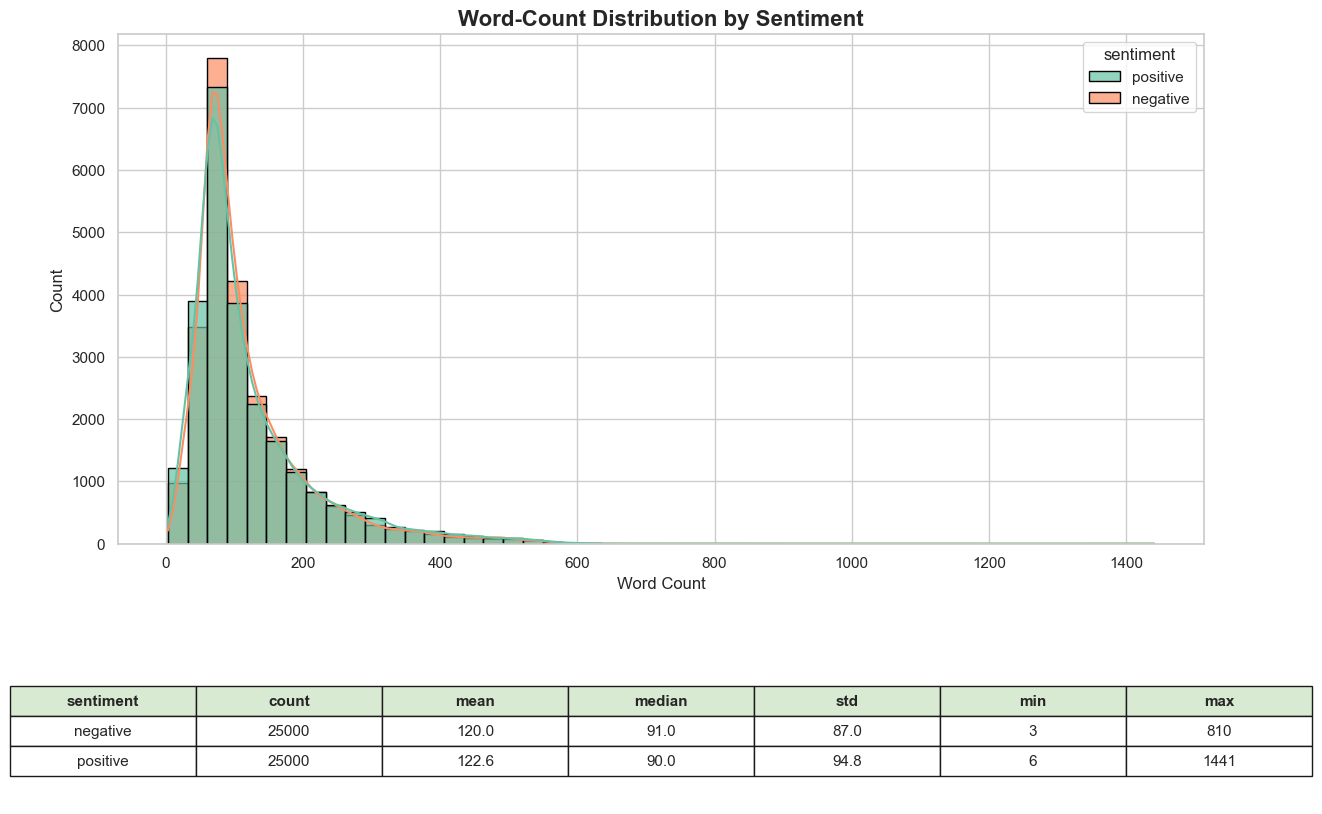

In [9]:
# Set Seaborn theme for consistent plotting aesthetics
sns.set_theme(style="whitegrid")

# Compute the word count of each review
df['word_count'] = df['review'].apply(lambda x: len(x.split()))

# Create a summary table grouped by sentiment (positive/negative)
summary_table = (
    df.groupby('sentiment')['word_count']
      .agg(['count', 'mean', 'median', 'std', 'min', 'max'])
      .round(1)
      .reset_index()
)

# Create a figure with two vertical sections (plot on top, table below)
fig = plt.figure(figsize=(14, 10))
grid = plt.GridSpec(2, 1, height_ratios=[3.5, 1], hspace=0.35)

# First subplot: Histogram of word counts by sentiment
ax1 = fig.add_subplot(grid[0])
sns.histplot(
    data=df,
    x='word_count',
    hue='sentiment',
    bins=50,
    kde=True,
    palette='Set2',
    alpha=0.7,
    edgecolor='black',
    ax=ax1
)
ax1.set_title('Word-Count Distribution by Sentiment', fontsize=16, fontweight='bold')
ax1.set_xlabel('Word Count', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)

# Second subplot: Summary statistics table
ax2 = fig.add_subplot(grid[1])
ax2.axis('off')

table = ax2.table(
    cellText=summary_table.values,
    colLabels=summary_table.columns,
    cellLoc='center',
    loc='center'
)

# Adjust table appearance
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 1.8)

for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#d9ead3')
    else:
        cell.set_facecolor('#ffffff')

plt.show()

**Observation: There are some outliers. Since the distribution is similar, suggesting there is no explicit correlation between text length and sentiment.**

In [10]:
# Initialize CountVectorizer (basic word tokenizer, lowercased, punctuation ignored)
vectorizer = CountVectorizer()

# Fit on the entire dataset and transform it
X = vectorizer.fit_transform(df['review'])

# Get the total number of unique words (features)
unique_word_count = len(vectorizer.get_feature_names_out())

print(f"Total unique words in the dataset: {unique_word_count}")

Total unique words in the dataset: 181566


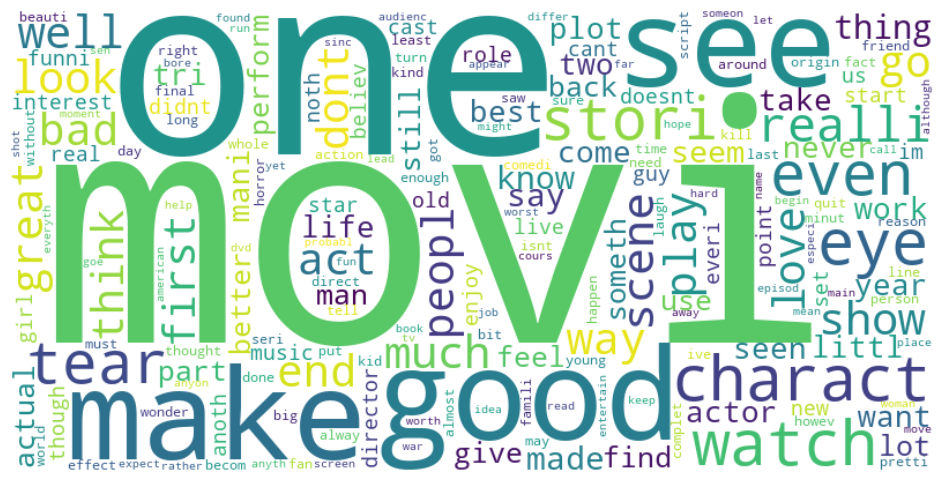

In [11]:
# Combine all reviews into one large string
text = " ".join(df['review'].dropna().astype(str).tolist())

# Define stopwords and add neutral terms
stopwords = set(STOPWORDS)
stopwords.update(["film"])  # add any other neutral words as needed

# Create and generate a word cloud image
wc = WordCloud(
    width=800,
    height=400,
    background_color="white",
    stopwords=stopwords,
    collocations=False,      # avoids joining words into bigrams
    max_words=200
).generate(text)

# Display the generated image
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


c:\Users\hanfu\.virtualenvs\coding_test-Y_YlFOR4\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


Text(0, 0.5, '')

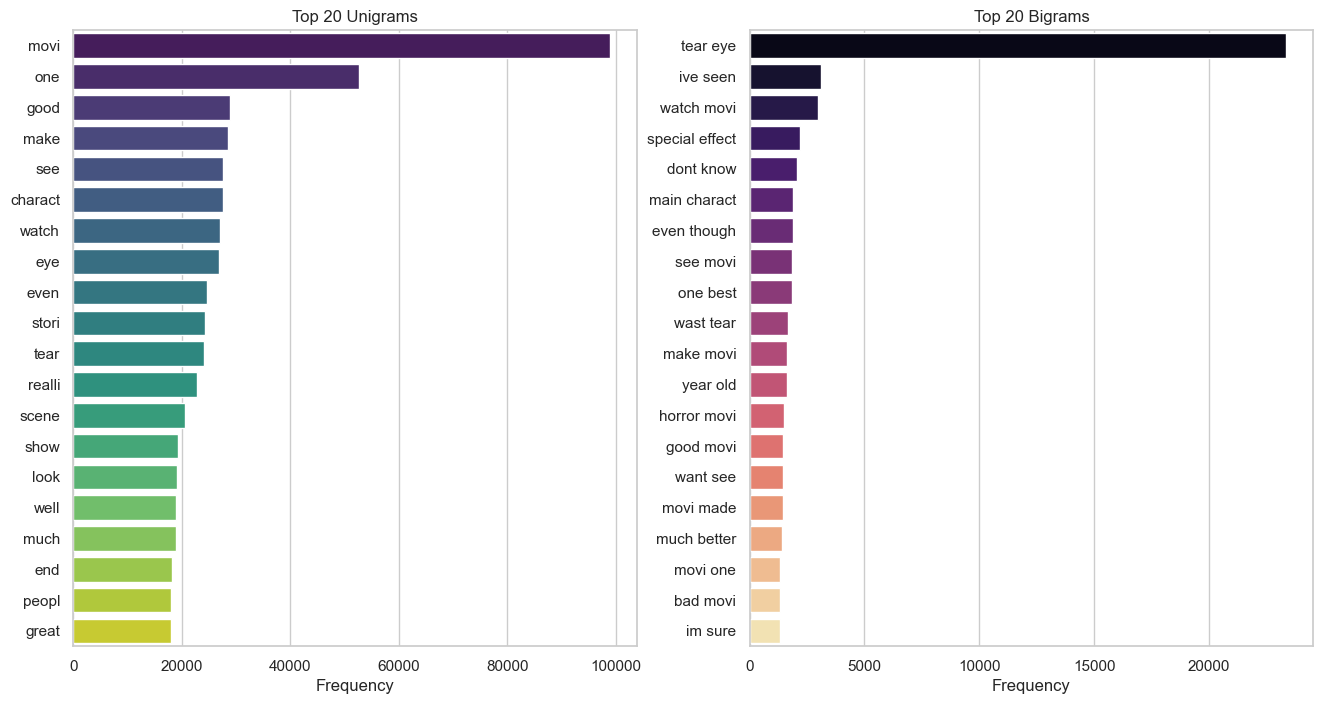

In [12]:
# Prepare reviews
reviews = df['review'].dropna().astype(str).tolist()

# Build custom stop_words list
custom_stopwords = list(STOPWORDS) + ["film"]

# Unigrams
uni_vect = CountVectorizer(stop_words=custom_stopwords, ngram_range=(1,1))
X_uni = uni_vect.fit_transform(reviews)
uni_counts = X_uni.sum(axis=0).A1
uni_features = uni_vect.get_feature_names_out()
top_unigrams = sorted(zip(uni_features, uni_counts), key=lambda x: x[1], reverse=True)[:20]

# Bigrams
bi_vect = CountVectorizer(stop_words=custom_stopwords, ngram_range=(2,2))
X_bi = bi_vect.fit_transform(reviews)
bi_counts = X_bi.sum(axis=0).A1
bi_features = bi_vect.get_feature_names_out()
top_bigrams = sorted(zip(bi_features, bi_counts), key=lambda x: x[1], reverse=True)[:20]

# set a nice Seaborn style
sns.set_theme(style="whitegrid")

# unpack your top lists
uni_words, uni_counts = zip(*top_unigrams)
bi_phrases, bi_counts = zip(*top_bigrams)

# create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=False)

# Top Unigrams
sns.barplot(x=list(uni_counts), y=list(uni_words), ax=ax1,
            hue=list(uni_words), legend=False, palette="viridis")
ax1.set_title("Top 20 Unigrams")
ax1.set_xlabel("Frequency")
ax1.set_ylabel("")

# Top Bigrams
sns.barplot(x=list(bi_counts), y=list(bi_phrases), ax=ax2,
            hue=list(bi_phrases), legend=False, palette="magma")
ax2.set_title("Top 20 Bigrams")
ax2.set_xlabel("Frequency")
ax2.set_ylabel("")


**The dataset is well balanced, and all reviews have been preprocessed, and I can see in word cloud and Unigrams/Bigrams there are a lot of meaningful semantic words, this will be helpful to the model training.**